# Reporte y Analisis de Modelo

## Introduccion
Es este analisis se observaran los resultados obtenidos de la implementacion de modelos realizados en el documento ***momento-retro2.ipynb***. Se hara un analisis del modelo de *LogisticRegression* ya que fue el modelo que obtuvo el mejor desempeño entre los modelos elegidos para la implementacion. En este reporte analizaremos a detalle caracteristicas como la **varianza** y el **sesgo** de nuestro modelo asi como ver si existe una mejora en el modelo tras ajustar los parametros del mismo

## Analisis inicial

### Setup
Iniciemos por crear nuestro ambiente de trabajo e implementendo nuestro dataframe con nuestra dataset *Estatura-peso_HyM.csv*.

In [2]:
# Uso general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Mlxtend
from mlxtend.evaluate import bias_variance_decomp

# Seaborn
import seaborn as sns

warnings.filterwarnings("ignore")

# Lectura de csv y creacion de dataframe
data = pd.read_csv("Estatura-peso_HyM.csv")

# Division de informacion por sexo
dataH = data.loc[:, ["H_estat", "H_peso"]]
dataH.columns = ["Estatura", "Peso"]
dataM = data.loc[:, ["M_estat", "M_peso"]]
dataM.columns = ["Estatura", "Peso"]

# Identificadores de sexo: 0 = Hombre, 1 = Mujer
dataH["Sexo"] = 0
dataM["Sexo"] = 1

# Union de ambos dataframes
df = pd.concat([dataH, dataM])

### Entrenamiento
Ahora entrenemos nuestro modelo como lo hicimos anteriormente para obtener un resultado de referencia. Entrenaremos el modelo con con un train-test split de 70 - 30 para entrenar y probar el modelo respectivamente.

Logistic Regression Train: 88.64%
Logistic Regression Test: 91.67%


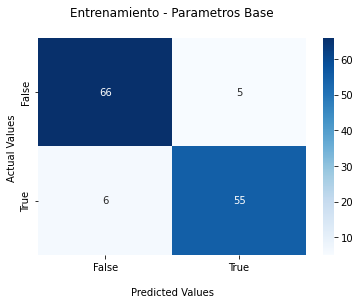

In [3]:
s = StandardScaler()

# Separacion de variable dependiente y variables independiantes
x = s.fit_transform(df.drop(columns="Sexo", axis=1))
y = df.Sexo.values

# Creacion de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"Logistic Regression Train: {accuracy_score(y_train, model.predict(x_train))*100:.2f}%")
print(f"Logistic Regression Test: {accuracy_score(y_test, y_pred)*100:.2f}%")
cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Entrenamiento - Parametros Base\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Como podemos observar obtenemos los mismos resultados que se obtuvieron en la implementacion de modelos, con esto podemos comenzar el analisis del modelos teniendo de referencia una **R^2** de 91.67%.

### Varianza y Sesgo

In [4]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model, x_train, y_train, x_test, y_test, 
    loss='0-1_loss',
    random_seed=42)

print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)



Average bias: 0.083
Average variance: 0.014


### Predicciones
Las siguinetes predicciones seran con datos fuera del dataset original. Los datos estan basados en la tabla del IMC utilizando estaturas y pesos de ambos sexos. La distribucion de las respuestas seran un hombre y una mujer sucesivamente.

Prediccion 1 con datos de prediccion: [1.68, 66.21]
-    Resultado Esperado: 0  Resultado Real: 0
Prediccion 2 con datos de prediccion: [1.68, 61.83]
-    Resultado Esperado: 1  Resultado Real: 1
Prediccion 3 con datos de prediccion: [1.78, 73.36]
-    Resultado Esperado: 0  Resultado Real: 0
Prediccion 4 con datos de prediccion: [1.78, 64.0]
-    Resultado Esperado: 1  Resultado Real: 1
Prediccion 5 con datos de prediccion: [1.65, 58.33]
-    Resultado Esperado: 0  Resultado Real: 1
Prediccion 6 con datos de prediccion: [1.65, 52.12]
-    Resultado Esperado: 1  Resultado Real: 1
Prediccion 7 con datos de prediccion: [1.73, 66.63]
-    Resultado Esperado: 0  Resultado Real: 0
Prediccion 8 con datos de prediccion: [1.73, 59.42]
-    Resultado Esperado: 1  Resultado Real: 1
Prediccion 9 con datos de prediccion: [1.65, 65.87]
-    Resultado Esperado: 0  Resultado Real: 0
Prediccion 10 con datos de prediccion: [1.65, 59.52]
-    Resultado Esperado: 1  Resultado Real: 1

Logistic Regression

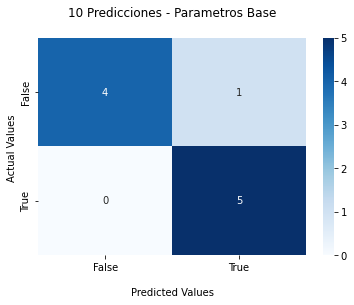

In [5]:
predicciones = {"AyP": [[1.68, 66.21],
                        [1.68, 61.83],
                        [1.78, 73.36],
                        [1.78, 64.0],
                        [1.65, 58.33],
                        [1.65, 52.12],
                        [1.73, 66.63],
                        [1.73, 59.42],
                        [1.65, 65.87],
                        [1.65, 59.52]],
                "Sexo":[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}

prediccionesDF = pd.DataFrame(predicciones)

result_pred = []

for caso in prediccionesDF["AyP"]:
    x = s.transform([caso])
    result_pred.append(model.predict(x)[0])

for i in range(len(prediccionesDF)):
    print(f"Prediccion {i + 1} con datos de prediccion: {prediccionesDF['AyP'][i]}")
    print(f"-    Resultado Esperado: {prediccionesDF['Sexo'][i]}  Resultado Real: {result_pred[i]}")

print()
print(f"Logistic Regression: {accuracy_score(prediccionesDF['Sexo'], result_pred)*100:.2f}%")

cm = confusion_matrix(prediccionesDF["Sexo"], result_pred)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('10 Predicciones - Parametros Base\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Empezando con el analisis de nuestro modelo base, podemos ver que tenemos valores relativamente bajos de sesgo y especialmente de varianza. El sesgo es el valor que mas destaca porque apesar de que no es un valor tan alto, puede ser el causante de confusiones en el modelo. Tambien podemos observar que nuestro modelo esta relaivamente bien ajustado ya que el **test score** es mayor a **train score** aunque esto se puede deber a los parametros por defecto del modelo y se comprobara mas adelante. Podemos comparar los resultados hechos con una prueba de 10 predicciones con datos fuera de nuestro data set. Sabemos que el modelo tiene una precision del **91.67%** y haciendo la prueba con 10 predicciones obtenemos una precision de **90%**. Se puede observar que hay una ligera confusion al clasificar con hombres de baja estatura. Tomando todo esto en cuenta podemos concluir que tenemos una base solida para comezar un ajuste de parametros.

## Ajuste de parametros

### Tamaño de sets de prueba y entrenamiento
Se realizara un analisis de los resultados del modelo cambiando cada vez el tamaño del train-test en intervalos de **10%**, es decir comenzando en 10 - 90 hasta terminar en 90-10.

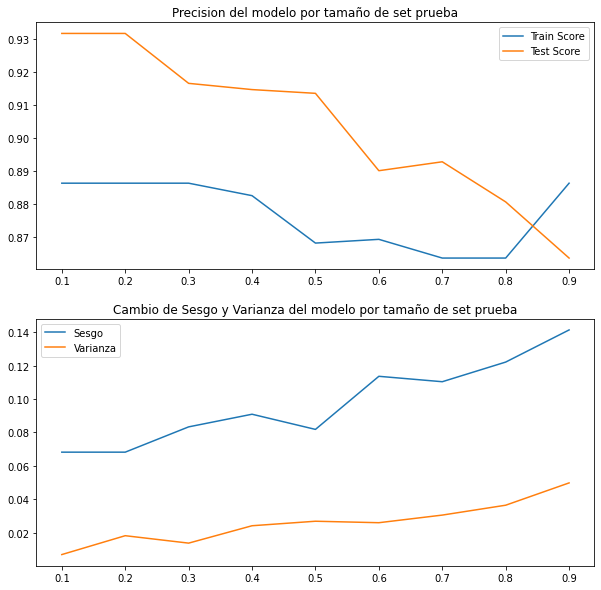

In [6]:
train_score = []
test_score = []
bias = []
variance = []

intervalos = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

x = s.fit_transform(df.drop(columns="Sexo", axis=1))
y = df.Sexo.values

for i in intervalos:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=42)
    model.fit(x_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(x_train)))
    test_score.append(accuracy_score(y_test, model.predict(x_test)))
    avg_e_loss, avg_bias, avg_var = bias_variance_decomp(
        model, x_train, y_train, x_test, y_test,
        loss="0-1_loss",
        random_seed=42)
    bias.append(avg_bias)
    variance.append(avg_var)

figure, axis = plt.subplots(2)
figure.set_size_inches(10,10)
axis[0].plot(intervalos, train_score, label = "Train Score")
axis[0].plot(intervalos, test_score, label = "Test Score")
axis[0].set_title("Precision del modelo por tamaño de set prueba")
axis[0].legend()

axis[1].plot(intervalos, bias, label = "Sesgo")
axis[1].plot(intervalos, variance, label = "Varianza")
axis[1].set_title("Cambio de Sesgo y Varianza del modelo por tamaño de set prueba")
axis[1].legend()

Con este ajuste podemos observar que obtenemos una mejor precision entre mas grande hagamos nuestro set de entrenamiento. Se tiene un descenso semi escalonado entre valores hasta llegar a valores cercanos al **70%** en donde la precision disminuye con cada porcion que quitemos. Asi mismo entre mas datos tenga el modelo para entrenar, el sesgo y la variaza disminuyen. La disminucion de la variaza es relativamente constante pero el sesgo tiene un pico de variacion a partir del **40%** hasta el **60%** en donde disminuye su aumento pero luego drasticamente aumenta.

Logistic Regression Train: 88.64%
Logistic Regression Test: 93.18%


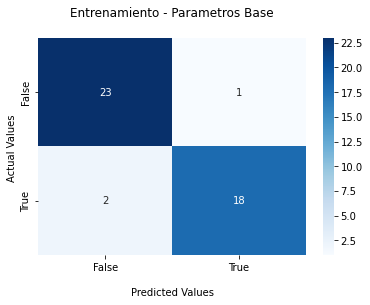

In [7]:
x = s.fit_transform(df.drop(columns="Sexo", axis=1))
y = df.Sexo.values

# Creacion de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"Logistic Regression Train: {accuracy_score(y_train, model.predict(x_train))*100:.2f}%")
print(f"Logistic Regression Test: {accuracy_score(y_test, y_pred)*100:.2f}%")
cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Entrenamiento - Parametros Base\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [8]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model, x_train, y_train, x_test, y_test, 
    loss='0-1_loss',
    random_seed=42)

print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average bias: 0.068
Average variance: 0.007


### Random State
El random state genera una semilla que ayuda al modelo a generar un split deterministico, es decir siempre igual. La ultima prueba que se hara es revisar si podemos obtener una mejor puntuacion cambiando el random state.

In [9]:
params = {
      "random_state": list(range(1,1000))
}

rng = GridSearchCV(
      estimator=model,
      param_grid=params
)

rng.fit(x_train, y_train)
print(rng.best_params_)

model_2 = LogisticRegression(random_state=1)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
print(f"Logistic Regression Test: {accuracy_score(y_test, y_pred_2)*100:.2f}%")

{'random_state': 1}
Logistic Regression Test: 93.18%


Haciendo una busqueda con un **GridSearch** nos arroja que el mejor parametro es el **random_state=1** pero el resultado sigue siendo el mismo debido a que el modelo no utiliza dicho parametro.

## Conclusiones
Tras hacer el ajuste de parametros se logro un inclemento del **1.51%** subiendo a **93.18%** de **91.67%** un incremento pequeño pero bienvenido. Asi mismo con este cambio de parametros se obtuvo una mejor varianza y sesgo, reduciendo la varianza a casi **0** llendo de **0.014** a **0.007** y el sesgo de **0.083** a **0.068**. Estas mejoras ayudan a que el modelo tenga un mejor desepmeño aunque aun existen mejoras que ayudarian al modelo a alcanzar mejores resultados entre ellas destaca la confusion que aun existe para clasificar correctamente a hombres de baja estatura sin sobre peso. Hablando mas en especifico del sesgo y varianza, concluimos con que el modelo tiene varianza baja y a pesar de que el bias parece bajo, es suficiente para crear la confusion anteriormente mencionada.

Tambien podemos ver que el modelo no presenta overffiting ni underffiting ya que al tratar datos fuera del modelo puede clasificarlos sin problema. Los datos que se usaron para las pruebas de prediccion se escogieron de para probar que tan preciso puede ser el modelo con datos cercanos, la estatura en cada par de datos es la misma y basado en el peso puede clasificar el sexo aunque como se menciono anterior mente aun se puede mejorar.